In [1]:
! pip install --quiet --upgrade nltk > /dev/null

In [2]:
import nltk
nltk.download('all', quiet=True)

True

In [3]:
import pandas as pd
import os
import csv
import nltk
import string

# Identify the working directory and data files
working_directory = "./34-tsne-KMeans-DBSCAN-MacBook"

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [4]:
df = pd.read_pickle("./21-Preprocess-Combined-Data-v2/dataframe.pickle")

In [5]:
verification_row = 9

In [6]:
# make a tag for this run
import datetime

TAG = f"{datetime.datetime.now():%Y_%m_%d_%s}"

In [7]:
scores = {}

In [8]:
df.shape

(5736, 20)

In [9]:
df.head()

,ROW_ID,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,GENERIC_NAME,DEVICE_REPORT_PRODUCT_CODE,UDI-DI,UDI-PUBLIC,DATE_OF_EVENT,REPORTER_OCCUPATION_CODE,REPORT_DATE,EVENT_LOCATION,SOURCE_TYPE,TOKENIZED_TEXT,NOPUNCT_TEXT,NOSTOPWORDS_TEXT,NODIGITS_TEXT,POS_TEXT,LEMMATIZED_TEXT,STEMMED_TEXT
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,,,07/30/2020,000,,I,CONSUMER,"[it, was, reported, that, the, transmitter, lo...","[it, was, reported, that, the, transmitter, lo...","[reported, transmitter, lost, connection, pump...","[reported, transmitter, lost, connection, pump...","[(reported, VBN), (transmitter, NN), (lost, VB...","[report, transmitter, lose, connection, pump, ...","[report, transmitt, lost, connect, pump, great..."
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,06/05/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,1435,No Device Output,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/05/2020,000,,I,CONSUMER,"[it, was, reported, that, transmitter, failed,...","[it, was, reported, that, transmitter, failed,...","[reported, transmitter, failed, error, occurre...","[reported, transmitter, failed, error, occurre...","[(reported, VBN), (transmitter, NN), (failed, ...","[report, transmitter, fail, error, occur, data...","[report, transmitt, fail, error, occur, data, ..."
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/23/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, revie...","[report, signal, loss, one, hour, occur, revie..."
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,05/25/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."


In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# create a DataFrame for the sentences
sentences_df = pd.DataFrame(
    columns=[
        'SENTENCE_ID',
        'SENTENCE', 
        'ROW_ID', 
        'FOI_TEXT', 
        'DEVICE_PROBLEM_CODE',
        'DEVICE_PROBLEM_TEXT'
    ]
)

# Iterate over every row in the FOI_TEXT DataFrame
# and create a new dataframe with a row for each sentence.
# Each row will have a sentence, the orginal ROW_ID, and the
# FOI_TEXT that it came from along with the DEVICE_PROBLEM_CODE and
# DEVICE_PROBLEM_TEXT from the orginal FOI_TEXT
sentence_counter = 0

for index, row in df.iterrows():
    for sentence in nltk.sent_tokenize(row['FOI_TEXT']):
        sentence_data = {
            'SENTENCE': sentence,
            'SENTENCE_ID': sentence_counter,
            'ROW_ID': row['ROW_ID'], 
            'FOI_TEXT': row['FOI_TEXT'], 
            'DEVICE_PROBLEM_CODE': row['DEVICE_PROBLEM_CODE'],
            'DEVICE_PROBLEM_TEXT': row['DEVICE_PROBLEM_TEXT']
        }
        sentence_data_df = pd.DataFrame(sentence_data, index=[sentence_counter])
        sentences_df = pd.concat([sentences_df, sentence_data_df])
        sentence_counter = sentence_counter + 1        

In [12]:
sentences_df.shape

(25686, 6)

In [13]:
sentences_df.head()

,SENTENCE_ID,SENTENCE,ROW_ID,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT
0,0,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem
1,1,THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem
2,2,NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem
3,3,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem
4,4,NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem


In [14]:
sentences_df['SENTENCE'][verification_row]

'THE PROBABLE CAUSE COULD NOT BE DETERMINED.'

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Process the sentences
import re
import nltk
import string

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def process_sentence(sentence):
    # Lowercase the sentence
    sentence = sentence.lower()

    # Remove any words that start with a digit
    sentence = re.sub(r'\b\d\w*\b', '', sentence)

    # Remove punctuation
    sentence_tokens = sentence.split()
    sentence_tokens = [token.translate(str.maketrans("", "", string.punctuation)) for token in sentence_tokens]

    # Remove stopwords
    sentence_tokens = [token for token in sentence_tokens if token not in stop_words]
    sentence = ' '.join(sentence_tokens)

    return sentence

sentences_df['PROCESSED_SENTENCE'] = sentences_df['SENTENCE'].apply(process_sentence)

In [17]:
sentences_df['PROCESSED_SENTENCE'][verification_row]

'probable cause could determined'

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

In [19]:
%pip install --upgrade --quiet sentence-transformers hdbscan mpld3 sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sentence_transformers import SentenceTransformer

# define the document embedding model
# https://www.sbert.net/docs/pretrained_models.html
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embedded_sentences = embedder.encode(sentences_df['PROCESSED_SENTENCE'])
embedded_sentences

array([[ 0.00797196,  0.06402366,  0.01412311, ...,  0.01263433,
        -0.09277472, -0.0401257 ],
       [-0.02872896,  0.01099847,  0.0145125 , ...,  0.03422188,
        -0.02442264, -0.04160525],
       [ 0.00838424,  0.05963197, -0.03641187, ...,  0.03092055,
        -0.00812463, -0.0049395 ],
       ...,
       [-0.06312984,  0.09404121, -0.02415263, ..., -0.01254782,
         0.10541873,  0.04489081],
       [ 0.00619849, -0.01331595,  0.05153756, ..., -0.06092134,
         0.00186172, -0.06808806],
       [ 0.03530972,  0.06425514,  0.06098982, ..., -0.06081251,
         0.06142472,  0.04099741]], dtype=float32)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# "np.array([i for i in df['EMBED']])" Converts the data into a 2d array
embedded_sentences_scaled = scaler.fit_transform(np.array([i for i in embedded_sentences]))

In [22]:
embedded_sentences_scaled

array([[0.5719789 , 0.6762022 , 0.4889078 , ..., 0.55340743, 0.36013085,
        0.40519148],
       [0.4158448 , 0.45435464, 0.49014124, ..., 0.61890954, 0.53317845,
        0.40002647],
       [0.57373285, 0.65782815, 0.3288343 , ..., 0.60889244, 0.57444024,
        0.52802426],
       ...,
       [0.26949558, 0.80179   , 0.3676664 , ..., 0.47699833, 0.861899  ,
        0.70197856],
       [0.5644342 , 0.3526276 , 0.60742104, ..., 0.33022082, 0.5997228 ,
        0.30757672],
       [0.68828   , 0.67717063, 0.63736176, ..., 0.33055103, 0.750519  ,
        0.688387  ]], dtype=float32)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized_sentences = vectorizer.fit_transform(sentences_df['PROCESSED_SENTENCE'])
vectorized_sentences

<25686x1050 sparse matrix of type '<class 'numpy.float64'>'
	with 134036 stored elements in Compressed Sparse Row format>

In [24]:
# Combine the embeddings and vectorized sentences into a single feature matrix
feature_matrix = pd.concat([pd.DataFrame(embedded_sentences_scaled), pd.DataFrame(vectorized_sentences.toarray())], axis=1)

In [25]:
feature_matrix.shape

(25686, 1434)

In [26]:
# importing libraries to use
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# T-SNE

- Note we have to keep number of components for t-sne to less than 4, because the main idea of t-sne is to visualize high-dimentional dataset into 2D or 3D

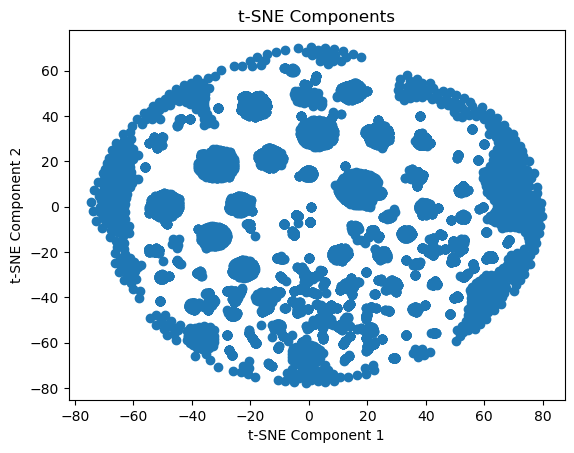

In [42]:
# creating t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# fitting t-SNE to standardized data
tsne_components = tsne.fit_transform(feature_matrix)

# plotting the t-SNE components
plt.scatter(tsne_components[:, 0], tsne_components[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Components")
plt.show()

In [43]:
# applying KMeans clustering to the t-SNE components
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_components)
    inertias.append(kmeans.inertia_)

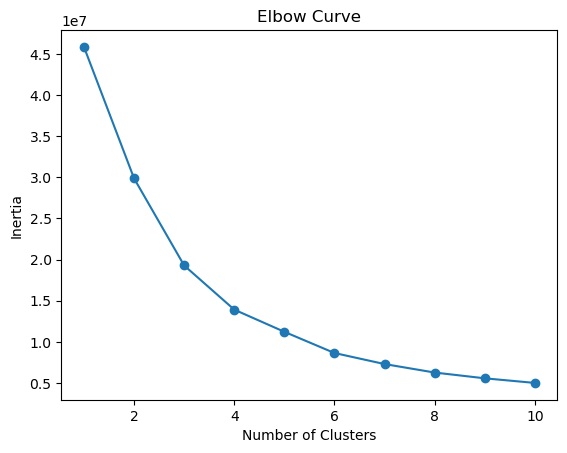

In [44]:
# plotting the elbow curve
plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

In [45]:
# choosing the appropriate number of clusters
k = 3

# performing KMeans clustering with chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
tsne_labels = kmeans.fit_predict(tsne_components)

In [46]:
# adding cluster labels to the sentence df
sentences_df["tSNE_CLUSTER"] = tsne_labels

In [47]:
sentences_df[["tSNE_CLUSTER", "SENTENCE"]]

,tSNE_CLUSTER,SENTENCE
0,0,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...
1,0,THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...
2,0,NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...
3,2,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
4,2,NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.
...,...,...
25681,2,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
25682,2,DATA WAS RECEIVED FOR EVALUATION.
25683,1,"HOWEVER, THE ALLEGED PRODUCT IS NOT PRESENT WI..."
25684,2,CONFIRMATION OF THE ALLEGATION AND A PROBABLE ...


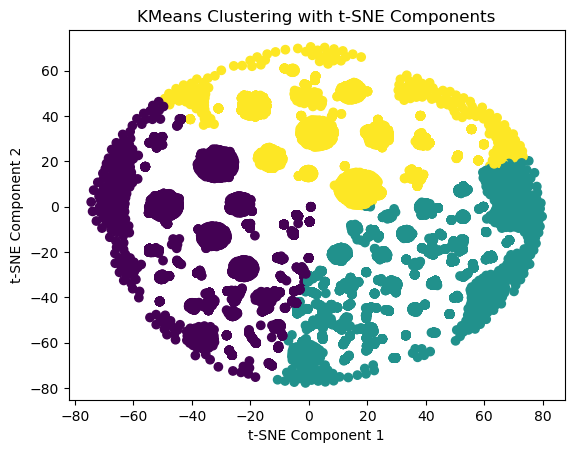

In [48]:
# ploting the data using t-SNE components and color by clustering labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=tsne_labels)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("KMeans Clustering with t-SNE Components")
plt.show()

In [49]:
# Compute the silhouette score
score = silhouette_score(tsne_components, tsne_labels)
scores["Kmeans with T-sne"] = score

print("Silhouette Score for Kmeans with T-sne: ",score)

Silhouette Score for Kmeans with T-sne:  0.3695673


# Applying DBSCAN after applying t-sne

## Build a k-distance graph to determine the optimal value of "EPS" using the elbow method

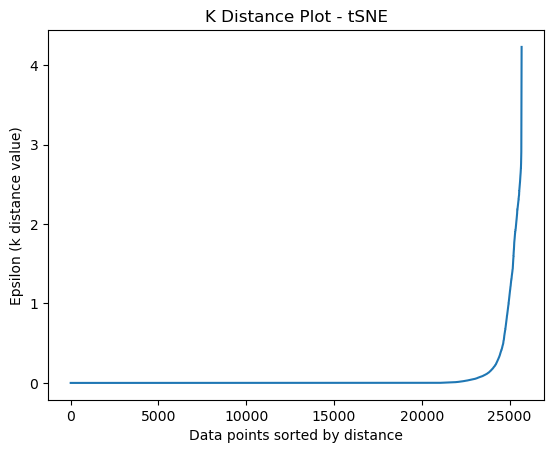

In [50]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(tsne_components)
distances, indices = neighbors_fit.kneighbors(tsne_components)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel("Data points sorted by distance")
plt.ylabel("Epsilon (k distance value)")
plt.title("K Distance Plot - tSNE")
plt.plot(distances)

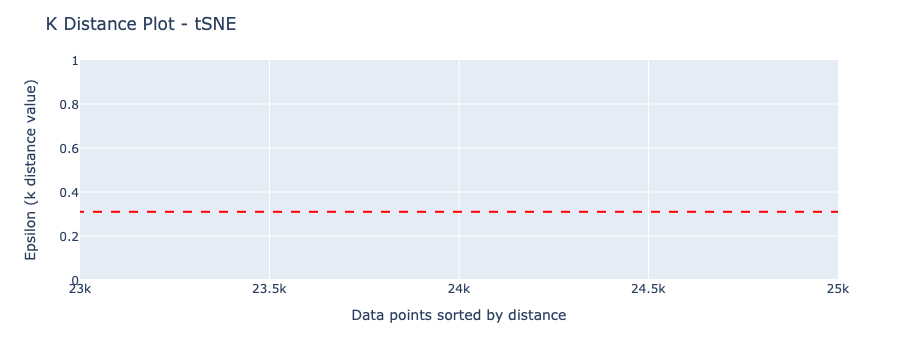

In [51]:
import plotly.express as px

fig_2 = px.line(distances)

# set the limits of the y-axis to: 0 to 1
fig_2.update_yaxes(range=[0, 1])

# set the limits of the x-axis to: 23000 to 25000
fig_2.update_xaxes(range=[23000, 25000])

# add a horizontal rule for y = 0.31
fig_2.add_shape(type='line',
              x0=0,
              y0=0.31,
              x1=25000,
              y1=0.31,
              line=dict(color='red', width=2, dash='dash'))

fig_2.update_layout(
    title="K Distance Plot - tSNE",
    xaxis_title="Data points sorted by distance",
    yaxis_title="Epsilon (k distance value)",
    showlegend=False
)

# write the graph to a file in the working directory
fig_2.write_html(f"{working_directory}/dbscan_parameter_estimation_for_tsne_{TAG}.html")

# show the plot
fig_2.show()

## Perform DBSCAN clustering

In [52]:
dbscan = DBSCAN(eps=0.31, min_samples=4)
dbscan_labels = dbscan.fit_predict(tsne_components)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


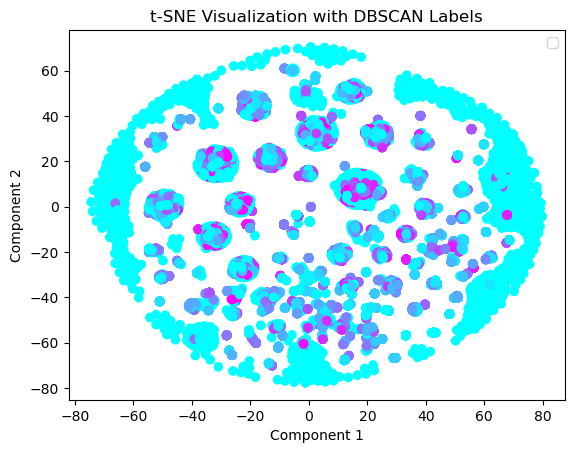

In [53]:
# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=dbscan_labels, cmap='cool')
plt.title('t-SNE Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [54]:
# Compute the silhouette score
score = silhouette_score(tsne_components, dbscan_labels)
scores["DBSCAN with T-sne"] = score

print("Silhouette Score for DBSCAN with T-sne: ",score)

Silhouette Score for DBSCAN with T-sne:  0.71539605


In [55]:
dbscan_clusters_number = np.unique(dbscan_labels)
print("Number of clusters find by dbscan {}".format(len(dbscan_clusters_number)))

Number of clusters find by dbscan 1016


In [56]:
# adding cluster labels to the sentence df
sentences_df["tSNE_with_DBSCAN_CLUSTER"] = dbscan_labels
sentences_df[["tSNE_with_DBSCAN_CLUSTER", "SENTENCE"]]

,tSNE_with_DBSCAN_CLUSTER,SENTENCE
0,0,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...
1,1,THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...
2,2,NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...
3,3,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
4,4,NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.
...,...,...
25681,333,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
25682,172,DATA WAS RECEIVED FOR EVALUATION.
25683,151,"HOWEVER, THE ALLEGED PRODUCT IS NOT PRESENT WI..."
25684,775,CONFIRMATION OF THE ALLEGATION AND A PROBABLE ...


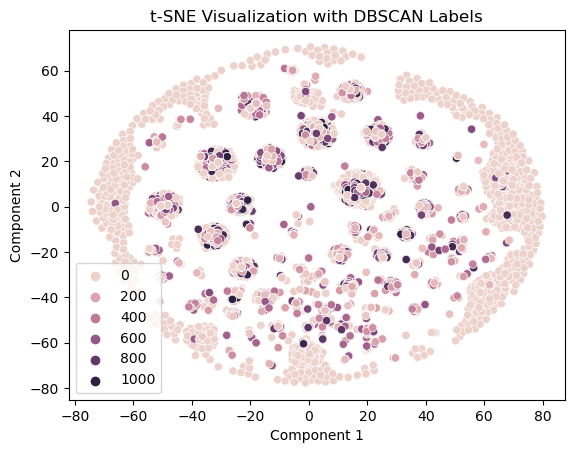

In [57]:
# Plot t-SNE visualization with  DBSCAN labels
sns.scatterplot(x= tsne_components[:, 0], y= tsne_components[:, 1], hue=dbscan_labels, cmap='cool')
plt.title('t-SNE Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Applying PCA, then t-sne, and then KMeans

In [75]:
# Applying PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
pca_data = pca.fit_transform(feature_matrix)

# Applying t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

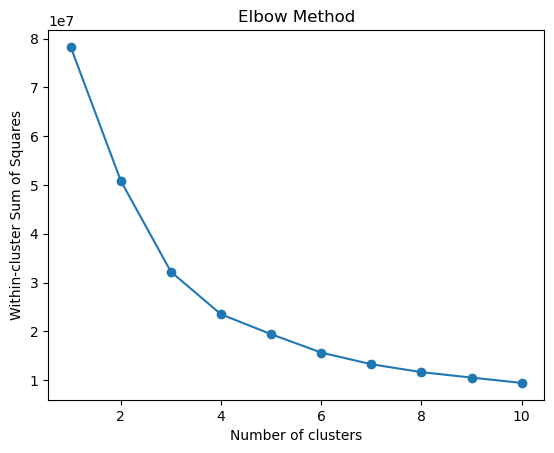

In [76]:
# Determining the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(tsne_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias,marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

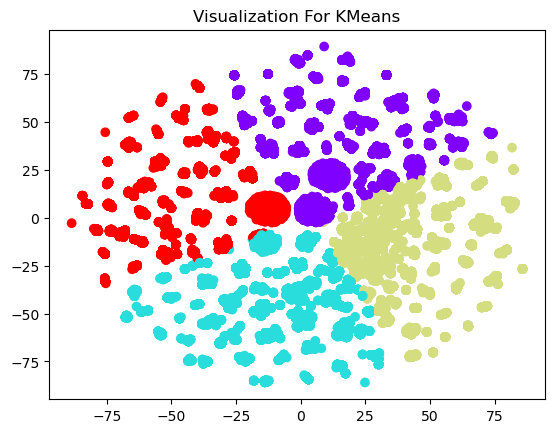

In [77]:
# Run k-means clustering with the optimal number of clusters
k = 4  # Change this to the optimal number of clusters determined by the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tsne_data)
pca_tsne_labels = kmeans.fit_predict(tsne_data)

# Plot the data points with the assigned cluster labels
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=pca_tsne_labels, cmap='rainbow')
plt.title('Visualization For KMeans')
plt.show()

In [92]:
# adding cluster labels to the sentence df
sentences_df["PCA_tSNE_CLUSTER"] = pca_tsne_labels

In [79]:
# Compute the silhouette score
score = silhouette_score(tsne_data, pca_tsne_labels)
scores["KMeans with PCA + T-sne"] = score

print("Silhouette Score for KMeans with PCA + T-sne: ",score)

Silhouette Score for KMeans with PCA + T-sne:  0.35572273


## Build a k-distance graph to determine the optimal value of "EPS" using the elbow method

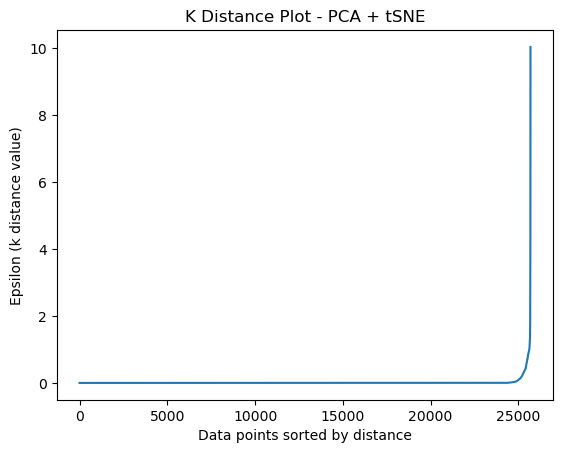

In [80]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(tsne_data)
distances, indices = neighbors_fit.kneighbors(tsne_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel("Data points sorted by distance")
plt.ylabel("Epsilon (k distance value)")
plt.title("K Distance Plot - PCA + tSNE")
plt.plot(distances)

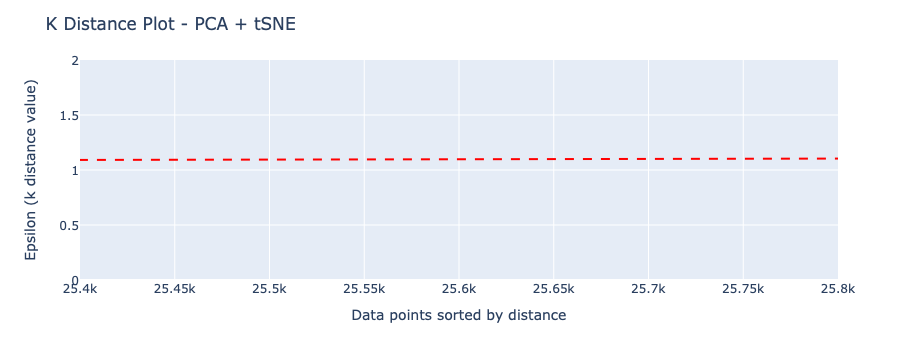

In [81]:
import plotly.express as px

fig_3 = px.line(distances)

# set the limits of the y-axis to: 0 to 1
fig_3.update_yaxes(range=[0, 2])

# set the limits of the x-axis to: 25400 to 25800
fig_3.update_xaxes(range=[25400, 25800])

# add a horizontal rule for y = 1.11
fig_3.add_shape(type='line',
              x0=0,
              y0=0.31,
              x1=26000,
              y1=1.11,
              line=dict(color='red', width=2, dash='dash'))

fig_3.update_layout(
    title="K Distance Plot - PCA + tSNE",
    xaxis_title="Data points sorted by distance",
    yaxis_title="Epsilon (k distance value)",
    showlegend=False
)

# write the graph to a file in the working directory
fig_3.write_html(f"{working_directory}/dbscan_parameter_estimation_for_pca_and_tsne_{TAG}.html")

# show the plot
fig_3.show()

In [82]:
# Performing DBSCAN clustering on the t-sne data
dbscan_pca_tsne = DBSCAN(eps=1.11, min_samples=4)
dbscan_labels_pca_tsne = dbscan_pca_tsne.fit_predict(tsne_data)

In [83]:
dbscan_labels_pca_tsne_clusters_number = np.unique(dbscan_labels_pca_tsne)
print("Number of clusters find by dbscan {}".format(len(dbscan_labels_pca_tsne_clusters_number)))

Number of clusters find by dbscan 707


In [93]:
# adding cluster labels to the sentence df
sentences_df["PCA_tSNE_with_DBSCAN_CLUSTER"] = dbscan_labels_pca_tsne

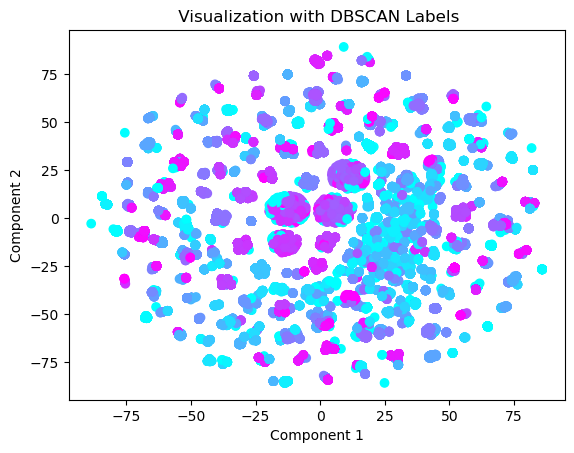

In [85]:
# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_labels_pca_tsne, cmap='cool')
plt.title(' Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [86]:
# Compute the silhouette score
score = silhouette_score(tsne_data, dbscan_labels_pca_tsne)
scores["DBSCAN with PCA + T-sne"] = score

print("Silhouette Score for DBSCAN with PCA + T-sne: ",score)

Silhouette Score for DBSCAN with PCA + T-sne:  0.8360337


## Summary

In [87]:
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Value'])
scores_df.sort_values(by='Value', ascending=False)

,Value
DBSCAN with PCA + T-sne,0.836034
DBSCAN with T-sne,0.715396
Kmeans with PCA,0.622903
"DBSCAN with PCA eps=0.75, min_samples=2",0.516582
Kmeans with T-sne,0.369567
KMeans with PCA + T-sne,0.355723
"DBSCAN with PCA eps=0.31, min_samples=2",0.215028
"DBSCAN with PCA eps=0.31, min_samples=4",0.215028
"DBSCAN with PCA eps=0.5, min_samples=2",-0.086812


In [88]:
print(f"Largest value is {scores_df.loc[scores_df['Value'].idxmax()]}")

Largest value is Value    0.836034
Name: DBSCAN with PCA + T-sne, dtype: float64


In [89]:
# Write the sentences dataframe to a CSV file
sentences_df.to_csv(f"{working_directory}/sentences_dataframe_{TAG}.csv", index=False)

# Write the sentences dataframe to a pickle
sentences_df.to_pickle(f"{working_directory}/sentences_dataframe_{TAG}.pickle")  